# Crime Analysis

<img src="../reports/figures/CRIME-SCENE-clean-up-business.jpg"/>

## Data Preperation Process

The process for getting data ready for a machine learning algorithm can be summarized in three steps:

1. Select Data - Consider what data is available, what data is missing and what data can be removed.
2. Preprocess Data - Organize your selected data by formatting, cleaning and sampling from it.
3. Transform Data - Transform preprocessed data ready for machine learning by engineering features using scaling, attribute decomposition and attribute aggregation.

<img src="../reports/figures/data-preprocess.png"/>

### 1. Select Data

We'll use the combined data that we processed from the raw files from Toronto's Open Data.

> http://data.torontopolice.on.ca/

In [63]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


crimes = pd.read_csv('../data/interim/crimes.csv')
crimes.head(50)

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,FID,date_diff_reported,day_id
0,-79.176010,43.802116,18291,GO-20143335879,2014-11-08,2014-11-20,House,1430,100,Assault,2014,November,20,324,Thursday,13,2014.0,November,8.0,312.0,Saturday,19,Assault,D42,131,Rouge (131),43.802116,-79.176010,10001,12 days 00:00:00.000000000,5
1,-79.452866,43.733387,18292,GO-20143349747,2014-11-08,2014-11-22,Commercial,1480,100,Assault - Resist/ Prevent Seiz,2014,November,22,326,Saturday,18,2014.0,November,8.0,312.0,Saturday,16,Assault,D32,33,Clanton Park (33),43.733387,-79.452866,10002,14 days 00:00:00.000000000,5
2,-79.403679,43.654961,18294,GO-20143367860,2014-11-08,2014-11-25,Outside,1430,100,Assault,2014,November,25,329,Tuesday,15,2014.0,November,8.0,312.0,Saturday,12,Assault,D14,78,Kensington-Chinatown (78),43.654961,-79.403679,10003,17 days 00:00:00.000000000,5
3,-79.367813,43.644344,18295,GO-20143307637,2014-11-08,2014-11-15,Commercial,1430,100,Assault,2014,November,15,319,Saturday,18,2014.0,November,8.0,312.0,Saturday,23,Assault,D51,77,Waterfront Communities-The Island (77),43.644344,-79.367813,10004,7 days 00:00:00.000000000,5
4,-79.358871,43.676205,18296,GO-20143309539,2014-11-16,2014-11-16,Outside,1410,100,Aggravated Assault,2014,November,16,320,Sunday,0,2014.0,November,16.0,320.0,Sunday,0,Assault,D55,67,Playter Estates-Danforth (67),43.676205,-79.358871,10005,0 days 00:00:00.000000000,6
5,-79.358871,43.676205,18297,GO-20143309539,2014-11-16,2014-11-16,Outside,1410,100,Aggravated Assault,2014,November,16,320,Sunday,0,2014.0,November,16.0,320.0,Sunday,0,Assault,D55,67,Playter Estates-Danforth (67),43.676205,-79.358871,10006,0 days 00:00:00.000000000,6
6,-79.358871,43.676205,18298,GO-20143309539,2014-11-16,2014-11-16,Outside,1410,100,Aggravated Assault,2014,November,16,320,Sunday,0,2014.0,November,16.0,320.0,Sunday,0,Assault,D55,67,Playter Estates-Danforth (67),43.676205,-79.358871,10007,0 days 00:00:00.000000000,6
7,-79.389183,43.649460,18299,GO-20143309845,2014-11-16,2014-11-16,Outside,1430,100,Assault,2014,November,16,320,Sunday,2,2014.0,November,16.0,320.0,Sunday,2,Assault,D52,77,Waterfront Communities-The Island (77),43.649460,-79.389183,10008,0 days 00:00:00.000000000,6
8,-79.389183,43.649460,18300,GO-20143309845,2014-11-16,2014-11-16,Outside,1430,100,Assault,2014,November,16,320,Sunday,2,2014.0,November,16.0,320.0,Sunday,2,Assault,D52,77,Waterfront Communities-The Island (77),43.649460,-79.389183,10009,0 days 00:00:00.000000000,6
9,-79.389183,43.649460,18301,GO-20143309845,2014-11-16,2014-11-16,Outside,1430,100,Assault,2014,November,16,320,Sunday,2,2014.0,November,16.0,320.0,Sunday,2,Assault,D52,77,Waterfront Communities-The Island (77),43.649460,-79.389183,10010,0 days 00:00:00.000000000,6


### 2.0 Preprocess Data
Handling categorical data

- **Label Encoder**: It is used to transform non-numerical labels to numerical labels (or nominal categorical variables). Numerical labels are always between 0 and n_classes-1. 
    - convertible -> 0
    - hardtop -> 1
    - hatchback -> 2
    - sedan -> 3
    - wagon -> 4
- **Dummy Coding / One-Hot-Encoding**: Dummy coding is a commonly used method for converting a categorical input variable into continuous variable. ‘Dummy’, as the name suggests is a duplicate variable which represents one level of a categorical variable. Presence of a level is represent by 1 and absence is represented by 0. For every level present, one dummy variable will be created.
    - `OneHotEncoder` cannot process string values directly. If your nominal features are strings, then you need to first map them into integers.
    - `pandas.get_dummies` is kind of the opposite. By default, it only converts string columns into one-hot representation, unless columns are specified. 

In [35]:
crimes["MCI"].value_counts()

Assault            71406
Break and Enter    54706
Robbery            14590
Auto Theft         13477
Theft Over          4207
Name: MCI, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [47]:
crimes = MultiColumnLabelEncoder(columns = ['premisetype','offence', 'Neighbourhood', "occurrencemonth", "MCI"]).fit_transform(crimes)

In [42]:
# get dummies
#crimes = pd.get_dummies(crimes, columns=['MCI'])

In [48]:
list(crimes)

['X',
 'Y',
 'Index_',
 'event_unique_id',
 'occurrencedate',
 'reporteddate',
 'premisetype',
 'ucr_code',
 'ucr_ext',
 'offence',
 'reportedyear',
 'reportedmonth',
 'reportedday',
 'reporteddayofyear',
 'reporteddayofweek',
 'reportedhour',
 'occurrenceyear',
 'occurrencemonth',
 'occurrenceday',
 'occurrencedayofyear',
 'occurrencedayofweek',
 'occurrencehour',
 'MCI',
 'Division',
 'Hood_ID',
 'Neighbourhood',
 'Lat',
 'Long',
 'FID',
 'date_diff_reported',
 'day_id']

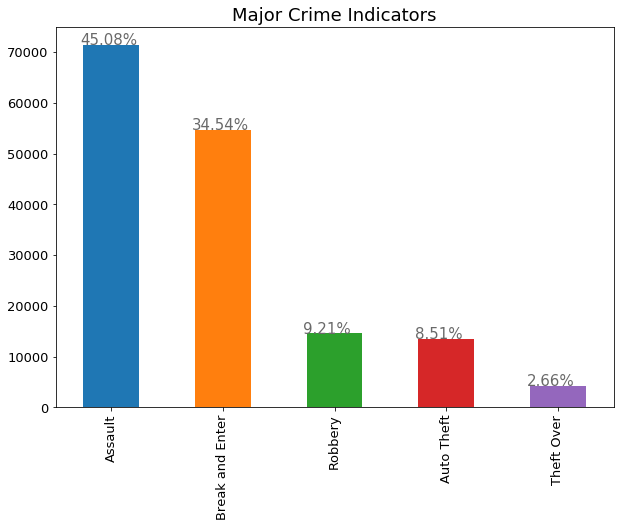

In [65]:
ax = crimes['MCI'].value_counts().plot(kind='bar', figsize=(10,7), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Major Crime Indicators", fontsize=18)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

### Handling  imbalanced datasets

In [55]:
# define X and y
feature_cols = ['premisetype', 'occurrenceyear', 'occurrencemonth', 
                'day_id', 'occurrencedayofyear', 'occurrencehour', 
                'Hood_ID', 'Neighbourhood', 'Lat', 'Long']
X = crimes[feature_cols]
y = crimes.MCI

In [56]:
 from imblearn.over_sampling import SMOTE
    
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X,y)

### Export to CSV

In [51]:
crimes.to_csv('../data/processed/crimes_le.csv', index=False)